# **CAPSTONE MODUL 2 | AIRBNB LISTINGS BANGKOK**
---

## **LATAR BELAKANG**
---

Airbnb didirikan pada tahun 2008 di San Francisco, California, Amerika Serikat. Sebagai salah satu platform online terbesar di dunia, analisis data dari jutaan penginapan di platform ini menjadi faktor penting bagi perusahaan. Hasil analisis data ini dapat digunakan untuk berbagai tujuan, seperti pengambilan keputusan bisnis, pemasaran, dan inovasi layanan. 

Data yang diberikan mencakup informasi tentang listing yang tersedia di Bangkok, Thailand. Setiap baris dalam tabel mewakili satu listing dan kolom menyimpan informasi terkait seperti nama, host, lokasi geografis, jenis kamar, harga, jumlah ulasan, dan lainnya. 

## **RUMUSAN DAN TUJUAN MASALAH**
---


### **RUMUSAN MASALAH**

Dalam konteks ini, rumusan masalahnya adalah :
1. Perusahaan ingin mengetahui wilayah mana saja yang akan menjadi prioritas utama dalam penentuan listing perusahaan.
2. Perusahaan juga ingin mengetahui karakteristik yang diminati untuk *guest* dalam memilih listing di Bangkok, Thailand?

### **TUJUAN MASALAH**

Sebagai data analyst, saya akan mencari tahu untuk jawabannya
1. Untuk mengetahui wilayah mana saja yang akan menjadi prioritas utama dalam penentuan listing perusahaan.
2. Untuk mengetahui karakteristik yang diminati untuk *guest* dalam memilih listing di Bangkok, Thailand.

## **Penjelasan Kolom Dataset**
--- 
Berikut adalah penjelasan mengenai nama kolom dan penjelasannya

| **Nama Kolom** | **Deskripsi** |
|---------|---------|
| Unnamed: 0 | Index dari Dataset |
| id | unique ID dari listing |
| name  | Nama penginapan dari listing |
| host_id  | unik ID untuk host |
| host_name | Nama host/pemilik  |
| neighbourhood  | Kawasan yang ditentukan berdasarkan koordinat geografis |
| latitude | Koordinat geografis lintang dari penginapan |
| longitude | Koordinat geografis bujur dari penginapan |
| room_type  | Jenis kamar atau akomodasi yang ditawarkan |
| price | Harga harian dalam mata uang lokal (Baht) |
| minimum_nights | Jumlah minimum malam yang dibutuhkan untuk pemesanan |
| number_of_reviews  | Total jumlah ulasan yang diterima penginapan |
| last_review  | Tanggal ulasan terbaru |
| reviews_per_month | Ulasan yang diterima per bulan |
| calculated_host_listings_count  | Jumlah penawaran yang dimiliki penyewa di kota/daerah yang sama |
| availability_365  | Ketersediaan penawaran dalam 365 hari mendatang |
| number_of_reviews_ltm | Jumlah ulasan yang diterima penawaran dalam 12 bulan terakhir |

Type Room terdapat 4 jenis :

**1. Entire Home/Apt(Apartemen)**

Apartemen adalah pilihan terbaik jika Anda mencari tempat seperti rumah di tempat yang jauh dari rumah. Dengan seluruh tempat, Anda akan memiliki seluruh ruangan untuk diri Anda sendiri. Biasanya, ini mencakup kamar tidur, kamar mandi, dapur, dan pintu masuk terpisah yang dedikasi. Host sebaiknya mencantumkan di deskripsi apakah mereka akan berada di properti atau tidak (contoh: "Host mendiami lantai pertama rumah") dan memberikan rincian lebih lanjut pada daftar.

**2. Private Room**

Private Room sangat baik jika Anda menginginkan sedikit privasi dan masih menghargai koneksi lokal. Ketika Anda memesan Private Room, Anda akan memiliki kamar tidur pribadi untuk tidur dan mungkin harus berbagi beberapa ruang dengan orang lain. Anda mungkin perlu melewati ruang dalam yang mungkin dihuni oleh host atau tamu lain untuk mencapai kamar Anda.

**3. Hotel Room**

Baik yang bersifat pribadi atau bersama, Hotel Room menyediakan tingkat layanan dan keramahan yang terkait dengan hotel tradisional. Kamar-kamar ini tersedia di hotel butik atau gaya hidup, hostel, penginapan sarapan pagi, atau properti serupa. Biasanya, mereka mencakup area umum yang ramai dan kamar-kamar dengan sentuhan unik.

**4. Shared Room**

Shared Room cocok bagi Anda yang tidak keberatan berbagi ruang dengan orang lain. Ketika Anda memesan kamar bersama, Anda akan tidur di ruang yang dibagikan dengan orang lain dan berbagi seluruh ruangan dengan orang lain. Shared Room populer di kalangan pelancong yang fleksibel yang mencari teman baru dan akomodasi yang ramah di kantong.

## **Import Library & Dataset**
---

In [86]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, kruskal, kstest

import warnings
warnings.filterwarnings("ignore")

Berikut 5 baris teratas dan terbawah dari dataset Airbnb Listings Bangkok

In [87]:
data = pd.read_csv('Airbnb Listings Bangkok.csv')
data

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [88]:
data =data.drop(data.columns[0], axis=1)
data

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


- Pada kolom 'Unnamed:0' telah saya hilangkan yang sebelumnya digunakan untuk index baris, karena untuk menampilkan dataset sudah ada nomor index secara otomatis dari python itu sendiri.

## **Data Understanding and Cleaning**
---

Sebelum saya masuk ke dalam analisis, saya perlu mengenal dataset saya lebih jauh dalam tahapan **Data Undestanding**. Dari proses ini, saya akan tahu apa saja anomali - anomali yang terdapat pada dataset. Sehingga diperlukan penanganan yaitu tahapan **Data Cleaning**. Pada penanganan anomali yang dilakukan, saya akan menjelaskan langkah - langkah yang saya lakukan.

### **Data Understanding**
---

Berikut adalah jenis tipe kamar yang disewakan.

In [89]:
data['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [90]:
display(data.describe())
data.describe(include='object')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

In [92]:
data.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Secara umum, kita bisa melihat bahwa:
1. Dataset ini memiliki 16 kolom dan 15.854 baris.
2. Saat saya melakukan statistika deskriptif dengan fungsi df.describe(), pada indeks *min* kolom price ditemukan yang berisi 0. Yang dimana, ini tidak relevan dan tidak mungkin untuk menyewakan tempat dengan harga 0 atau gratis.
3. Pada kolom **last_review** tipe datanya adalah *object*. Seharusnya tipe datanya adalah tipe data *datetime* karena harusnya berupa tanggal.
4. Berdasarkan pada kolom **last_review** terdapat nilai *max* tanggal 2022-12-11. Maka, dapat saya katakan bahwa dataset ini merupakan dataset pada tahun 2022 kebawah.

Untuk Missing Value terdapat 4 kolom yang didalamnya ada Missing Value(NaN), sebagai berikut:
- Kolom name terdapat 8 Missing value.
- Kolom host_name terdapat 1 Missing value.
- Kolom last_review terdapat 5790 Missing value.
- Kolom reviews_per_month terdapat 5790 Missing value.

## **MISSING VALUE**
---

### Missing Value
---

In [93]:
data[pd.isna(data['name'])]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


Pada kolom name, terdapat 8 nama yang isi nya NaN(tidak ada), yang artinya 8 nama penginapan listing yang tidak diberi nama listing oleh host.

In [94]:
data[pd.isna(data['host_name'])]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


Pada kolom host_name, terdapat 1 host yang isi nya NaN(tidak ada), yang artinya 1 host ini tidak memberikan namanya selaku pemilik listing.

In [95]:
data[pd.isna(data['last_review'])]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


Pada kolom last_review, terdapat 5790 yang isi nya NaN(tidak ada), yang artinya sebanyakn 5790 guest yang tidak memberikan penilaian review.

In [96]:
data[pd.isna(data['reviews_per_month'])]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


Pada kolom reviews_per_month, terdapat 5790 yang isi nya NaN(tidak ada), yang artinya sebanyakn 5790 guest yang tidak memberikan penilaian review.

### **HANDLING MISSING VALUE**
---

#### **Cek Sebaran Data Missing Value Setiap Kolom**
---


In [97]:
data.isna().sum()/data.shape[0]*100

id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

Jika dilihat hasil persentase missing value, dapat dijelaskan bahwa :
1. **Missing Value** di kolom name dan host_name memiliki proporsi yang tergolong sangat kecil yaitu **dibawah 0.06%**.
2. **Missing Value** di kolom last_review dan reviews_per_month memiliki proporsi yang cukup tinggi yaitu **diatas 10%**, dengan missing value di masing-masing kolom mencapai 36.52%. Dan kedua kolom ini terlihat saling berkaitan, jika data di last_review kosong, maka data di reviews_per_month juga kosong. Begitupun sebaliknya.


#### **Menghilangkan Kolom last_review**
---

In [98]:
data.drop(columns='last_review',inplace=True)

In [99]:
data['reviews_per_month'].fillna(0, inplace=True)
data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0.00,3,365,0


Jika dilihat lagi pada dataset ini:
- Kolom last_review telah dihilangkan.
- Nilai kosong atau NaN pada kolom reviews_per_month telah terganti menjadi 0.

#### **Penanganan Kolom name dan host_name**
---

In [100]:
display(data[data['name'].isna()])
data[pd.isna(data['host_name'])]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,0.00,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,0.00,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,0.00,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,0.00,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,0.00,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,0.00,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,0.03,3,220,0


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,0.02,1,365,0


- Pada kolom *name* yang berisi nilai kosong atau NaN, saya akan mengubahnya dari NaN menjadi no_name_of_listing.
- Pada kolom *host_name* yang berisi nilai kosong atau NaN, saya akan mengubahnya dari NaN menjadi no_hostname_of_listing.

In [101]:
# mengganti isi NaN pada kolom name
data['name'].fillna('no_name_of_listing', inplace=True)

# mengganti isi NaN pada kolom host_name
data['host_name'].fillna('no_hostname_of_listing', inplace=True)

In [102]:
data.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Setelah dilakukan Handling Missing Value, masih terdapat kolom price yang harganya 0. Untuk hal tersebut, saya akan drop kolom price = 0 karena tidak mungkin host menyewakan propertinya secara gratis.

In [103]:
data.drop(data[data['price'] <= 0].index, inplace=True)

### **Data Duplicate**
---

In [104]:
len(data[data.duplicated()])

0

Setelah saya periksa duplicated data, tidak terdapat data yang sama atau duplikat.

In [105]:
data.shape

(15853, 15)

Sekarang dataset ini terdapat 15853 baris dan 15 kolom.

### **Outliers Data**
---


#### Distribusi Data price Berdasarkan room_type

<Axes: xlabel='price', ylabel='room_type'>

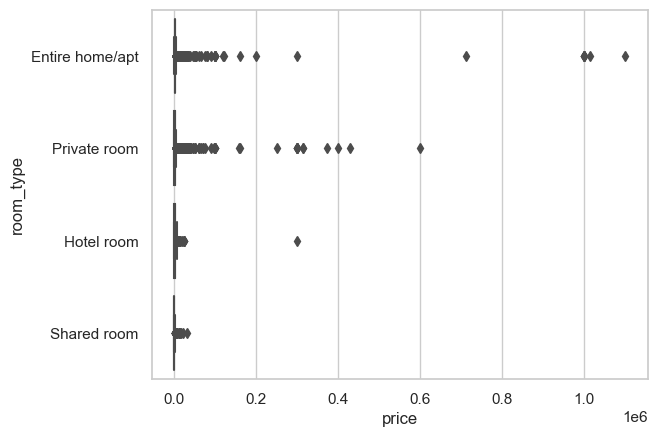

In [106]:
sns.boxplot(data = data,x='price', y='room_type')

setelah saya menggunakan boxplot untuk memeriksa outliers atau persebaran data ekstrim pada kolom *price* berdasarkan *room_type*. Saya bisa melihat disini bahwa pada kategori **Entire home/apt, Private room, dan Hotel room** terdapat listing dengan harga terbilang tinggi.

In [107]:
data[data['room_type']=='Entire home/apt'].sort_values(by='price', ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12868,635676064543597376,New 1 bedroom apartment BTS MRT Asoke,12464705,Lucio,Vadhana,13.742186,100.560394,Entire home/apt,1100000,14,0,0.00,1,365,0
12300,562972065309061724,3B中文No Guest Service Fee@Nana Asok/Soi11 Night...,131427125,Jj,Vadhana,13.746660,100.559100,Entire home/apt,1014758,30,2,0.32,10,75,2
6289,29909847,BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR,210559448,Cora,Khlong Toei,13.703330,100.592470,Entire home/apt,1000000,2,69,1.39,6,90,0
9345,39858231,1BR cozy condo close to ONNUT BTS.,210559448,Cora,Khlong Toei,13.704960,100.591510,Entire home/apt,1000000,25,2,0.05,6,88,0
4620,23740993,"Modern&Luxury apartment,5min to MRT,freeWifi",30803267,Yasmine,Huai Khwang,13.760650,100.568980,Entire home/apt,1000000,1,12,0.22,4,336,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11215,44327659,"Cozy condo, south of Chao Phraya, 100m from BTS",187810737,Lucy,Thon buri,13.721110,100.492850,Entire home/apt,348,360,0,0.00,1,364,0
9657,40682461,Stay in Bangkok,300906280,อัญชลี,Bang Kapi,13.801650,100.617990,Entire home/apt,346,2,5,0.18,3,326,4
1481,9465632,Condo near BTS - Bangwa Station,48621743,Joke,Phasi Charoen,13.720890,100.459850,Entire home/apt,346,180,0,0.00,1,365,0
5246,26251682,Elio Condominium near Sukhumvit Onnut,66095049,Michael,Phra Khanong,13.687070,100.599630,Entire home/apt,337,60,0,0.00,1,96,0


In [108]:
data[data['room_type']=='Private room'].sort_values(by='price', ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
4373,22633450,rm 1 : cozy & comfy,117057915,Jeab,Bang Phlat,13.791630,100.490380,Private room,600700,1,9,0.17,5,330,0
11885,52940323,🎗𝘾𝙝𝙚𝙬𝙖𝙩𝙝𝙖𝙞 𝙍𝙖𝙢𝙠𝙝𝙖𝙢𝙝𝙖𝙚𝙣𝙜\nBy KhunGrape,99882630,Jiranuch,Bang Kapi,13.760820,100.633660,Private room,429443,1,0,0.00,1,313,0
12792,629653142142561774,rm 6 : bright morning sunlight.,117057915,Jeab,Bang Phlat,13.790490,100.488160,Private room,400717,1,0,0.00,5,241,0
6549,31365769,"WH (container, Double bed, 2ppl -F)",234881965,Napawadee,Khlong Toei,13.735140,100.552170,Private room,372227,1,24,0.50,4,147,0
6760,31364368,"WH (Container style, twin bed, 2ppl, citycente...",234881965,Napawadee,Khlong Toei,13.735050,100.552390,Private room,314899,1,4,0.10,4,147,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11663,49745793,วิภาแมนชั่น ติดถนนลาดพร้าว83 สะดวกและสบาย,360388789,นิภาวรรรณ,Wang Thong Lang,13.785760,100.614520,Private room,315,120,0,0.00,1,365,0
7831,34752495,Local life near svarnmbumi airport ; nature,131930129,Gondal,Nong Chok,13.814480,100.835430,Private room,310,1,0,0.00,1,89,0
8974,38406752,🏡5 mins walk to 🚅 Cozy room in a local living😊,29685153,Mon,Phasi Charoen,13.726350,100.465140,Private room,304,2,16,0.42,2,330,11
9529,40547972,Private fan room with local family,314098135,Khwanjai,Bangkok Noi,13.754210,100.470770,Private room,300,1,1,0.03,1,227,0


In [109]:
data[data['room_type']=='Hotel room'].sort_values(by='price', ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
2668,16139502,Nice Check-in My Hostel (Private 2 beds),51074483,Nuttawut,Ratchathewi,13.75113,100.52731,Hotel room,300000,1,2,0.03,5,365,0
3415,19469957,Stylish 2 Bedroom Apartment in Ekkamai,33550104,Kasamsan,Vadhana,13.73511,100.59068,Hotel room,24390,2,62,0.94,6,179,6
6281,30329172,European Design In The City Near Shopping Mall,226941360,Patawan,Vadhana,13.74248,100.55770,Hotel room,23671,1,0,0.00,6,89,0
6283,30329222,One Bed In The City of Sukhumvit Near SkyTrain,226941360,Patawan,Vadhana,13.74226,100.55934,Hotel room,23629,1,0,0.00,6,0,0
6282,30329202,Bedroom In Town Central of Sukhumvit Near BTS,226941360,Patawan,Vadhana,13.74218,100.55802,Hotel room,23029,1,0,0.00,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6170,30240982,Mum Sabaay Hostel,227101089,Phrawpanthana,Sathon,13.71624,100.52066,Hotel room,330,1,0,0.00,1,0,0
8445,37029994,Mind day Hostel Khaosan 12-Mixed DormitoryFL.3,277316591,Mindday,Phra Nakhon,13.76101,100.49881,Hotel room,326,1,4,0.10,6,363,0
8983,38611956,Mind Day Hostel Khaosan - 12 Mixed Dormitory,277316591,Mindday,Phra Nakhon,13.76276,100.49761,Hotel room,318,1,2,0.05,6,365,0
2770,16443912,4Beds Female Dormitory@Baan 89 Hostel,62060341,Baan 89,Phra Nakhon,13.75451,100.50229,Hotel room,318,1,1,0.02,5,271,0


Dari distribusi ketiga tipe kamar diatas dapat diartikan bahwa :

Setiap host dapat menentukan harga yang ditawarkan berdasarkan fasilitas yang disediakan. Dan jika saya lihat juga, sudah ada beberapa listing yang terdapat ulasan/review yang berarti listing tersebut sudah pernah disewakan dan digunakan oleh guest. Maka, saya tidak memberi tindakan seperti menghapus data outliers tersebut karena data ini sudah valid.

#### Distribusi Data number_of_reviews Berdasarkan room_type

<Axes: xlabel='number_of_reviews', ylabel='room_type'>

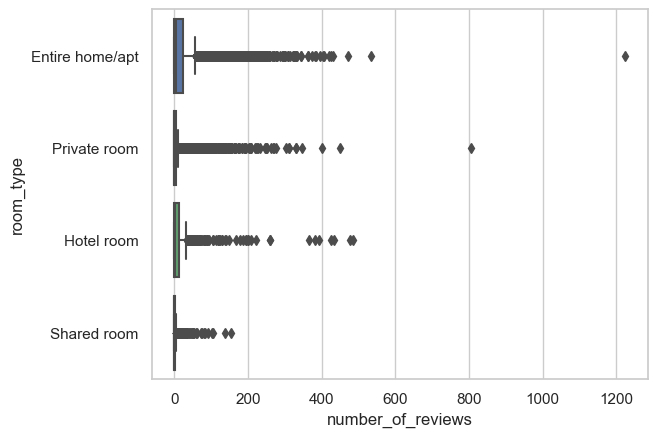

In [110]:
sns.boxplot(data = data,x='number_of_reviews', y='room_type')

setelah saya menggunakan boxplot untuk memeriksa outliers atau persebaran data ekstrim pada kolom *number_of_reviews* berdasarkan *room_type*. Saya bisa melihat disini bahwa pada kategori **Entire home/apt, Private room, dan Hotel room** terdapat listing dengan harga terbilang tinggi.

In [111]:
data[data['room_type']=='Entire home/apt'].sort_values(by='number_of_reviews', ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3737,20869092,Beautiful One Bedroom Apartment Near Skytrain,116193397,Suchada,Phaya Thai,13.773690,100.540790,Entire home/apt,1571,3,1224,19.13,1,310,109
1470,9453790,37 Nature House: 10 mins to DMK Int'l Airport,35462876,Wuthiphon,Lak Si,13.871450,100.580390,Entire home/apt,1039,1,533,6.22,9,346,18
53,1026451,"♡Chic Studio, Easy Walk to Pier & BTS Taksin♡",3346331,Bee,Sathon,13.711920,100.515350,Entire home/apt,866,2,472,4.02,7,320,29
80,393066,✺✺99 feet in the sky✺✺,1927968,Evan,Sathon,13.720620,100.547070,Entire home/apt,829,1,430,3.39,37,334,10
127,605314,☀ ☼Sky bedroom with a smooth life view☼☀,1927968,Evan,Sathon,13.720610,100.547060,Entire home/apt,750,1,426,3.39,37,344,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10400,42389898,Cozy stay heart of Bangkok,278213316,Jo,Parthum Wan,13.740740,100.546530,Entire home/apt,1500,30,0,0.00,1,180,0
5376,26474913,217 Bang Phlat House,33466877,Napat,Bang Phlat,13.790450,100.483150,Entire home/apt,4800,2,0,0.00,1,0,0
1181,8759900,Luxury townhouse,45236199,Nucharee,Bang Kapi,13.752260,100.633860,Entire home/apt,6000,3,0,0.00,2,88,0
10398,42025028,"1 BR 40sqm Apt Sathorn area,WiFi,Pool,Pet Frie...",333058141,Kung,Yan na wa,13.702870,100.537620,Entire home/apt,1599,1,0,0.00,1,177,0


In [112]:
data[data['room_type']=='Private room'].sort_values(by='number_of_reviews', ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6586,31077175,FREE PICK UP⭐BKK AIRPORT/BREAKFAST/PRIVATE DELUXE,158545122,Pailin,Lat Krabang,13.72132,100.76495,Private room,1032,1,807,16.62,3,348,146
1673,11753619,near DMK: Don Mueang International Airport,48491149,Auttapon,Don Mueang,13.88852,100.59296,Private room,911,1,451,5.70,5,356,3
2725,16245152,Ba hao Residence x MAITRI CHIT ROOM,2389272,Bua,Pom Prap Sattru Phai,13.74030,100.51407,Private room,3714,1,402,5.84,2,253,73
2281,14493164,Private Cozy Room (Free Breakfast) 20 mins to DMK,71898274,Kay,Chatu Chak,13.80137,100.57047,Private room,849,1,348,4.53,3,328,10
3335,18155163,Ba hao Residence x SANTIPHAP ROOM,2389272,Bua,Pom Prap Sattru Phai,13.74030,100.51407,Private room,3714,1,330,4.75,2,242,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,31047280,Bansuan Sukhumvit Condomenium On nut 46,231904220,Mam-Onuma,Suanluang,13.70650,100.63357,Private room,2000,3,0,0.00,1,365,0
6550,31366125,"26 m2, bathtub, 2pax, Airport Link/BTS Phayathai",231387551,Hotel Tranz,Ratchathewi,13.75583,100.53546,Private room,3100,1,0,0.00,7,175,0
6569,30915542,"Spacious & private, closed to tourist attractions",1472469,Amora,Dusit,13.77440,100.52301,Private room,2000,1,0,0.00,2,365,0
6572,31052941,The people,229551158,รุจิรา,Bang Kapi,13.76932,100.64009,Private room,690,1,0,0.00,1,364,0


In [113]:
data[data['room_type']=='Hotel room'].sort_values(by='number_of_reviews', ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
905,5964843,The Mustang Nero/No.4 The Horse,30963587,Themustang,Khlong Toei,13.71143,100.59390,Hotel room,2329,1,486,5.26,10,47,6
622,6013487,The Mustang Nero/No.3 The Wolf,30963587,Themustang,Khlong Toei,13.71286,100.59172,Hotel room,2329,1,477,5.11,10,50,6
1462,9849435,The Mustang Nero/No.7 The Zebra Song,30963587,Themustang,Khlong Toei,13.71150,100.59397,Hotel room,2329,1,433,5.06,10,44,19
623,6033632,The Mustang Nero/No.2 Black Bird,30963587,Themustang,Khlong Toei,13.71136,100.59217,Hotel room,2000,1,426,4.65,10,0,0
625,6033826,The Mustang Nero/No.1 Magic Dragon,30963587,Themustang,Khlong Toei,13.71174,100.59380,Hotel room,2286,1,393,4.29,10,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7935,34987489,"Bangkok Shortstay, 2 bedroom apartment",261682047,Bangkok Shortstay,Vadhana,13.73679,100.57050,Hotel room,7929,1,0,0.00,2,80,0
7940,35428141,8 Beds Mixed Dorm with curtain,66572330,Nap@Pan Hostel Silom,Bang Rak,13.72707,100.52615,Hotel room,1000,1,0,0.00,4,364,0
7955,35434436,8 Bed Mixed Dorm,66572330,Nap@Pan Hostel Silom,Bang Rak,13.72718,100.52600,Hotel room,1000,1,0,0.00,4,365,0
5411,27211807,Bed in 8-bed Mixed Dorm in Ratchada/WiFi,12304405,Siamaze,Din Daeng,13.78532,100.57131,Hotel room,433,1,0,0.00,8,353,0


Dari distribusi ketiga tipe kamar diatas dapat diartikan bahwa :

Semakin banyak review berarti *guest* yang pernah menggunakan listing tersebut bisa dibilang mereka merasa puas dengan fasilitas yang ada dan tempat mereka gunakan. *Guest* juga memiliki hak atas memberikan review ataupun tidak memberikan review. Maka untuk ini, saya tidak memberi tindakan atau mempertahankan outliers tersebut karena data ini sudah valid.

## **Pembuatan Kolom Baru**
---


#### Kolom Area_District

In [114]:
data['neighbourhood'].nunique()

50

In [115]:
data['neighbourhood'].unique()

array(['Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng',
       'Bang Kho laen', 'Rat Burana', 'Chatu Chak', 'Khlong San',
       'Bang Rak', 'Phaya Thai', 'Sathon', 'Khlong Toei', 'Vadhana',
       'Sai Mai', 'Lat Krabang', 'Bangkok Yai', 'Wang Thong Lang',
       'Huai Khwang', 'Phasi Charoen', 'Bang Sue', 'Nong Chok',
       'Phra Khanong', 'Thawi Watthana', 'Parthum Wan', 'Pra Wet',
       'Phra Nakhon', 'Thon buri', 'Yan na wa', 'Suanluang', 'Don Mueang',
       'Dusit', 'Lak Si', 'Samphanthawong', 'Bueng Kum', 'Bang Phlat',
       'Saphan Sung', 'Min Buri', 'Khan Na Yao', 'Khlong Sam Wa',
       'Bang Khen', 'Lat Phrao', 'Chom Thong', 'Bangkok Noi',
       'Pom Prap Sattru Phai', 'Nong Khaem', 'Thung khru', 'Bang Khae',
       'Bang Khun thain', 'Taling Chan', 'Bang Bon'], dtype=object)

Disini saya akan membuat kolom baru bernama *area_district* dimana kolom ini berisi pengelompokkan wilayah dari kolom *neighbourhood*  di Bangkok yang terdiri dari 50 data. Saya akan memabagi menjadi 3 wilayah seperti:
- Inner(area tengah).
- Intermediate( luar dari Inner).
- Outer(area terluar)

Dengan adanya pengelompokkan tersebut, akan memudahkan saya dalam melakukan analisis.

Jika ingin melihat bagaimana saya melakukan pembagian wilayahnya, dapat dilihat [disini](https://www.researchgate.net/publication/351051652_Molecular_Detection_of_Bartonella_spp_and_Hematological_Evaluation_in_Domestic_Cats_and_Dogs_from_Bangkok_Thailand) dan untuk pembagian tata letak wilayahnya saya melihat [disini](https://p2k.stekom.ac.id/ensiklopedia/Daftar_distrik_Bangkok).

In [116]:
def kategori_area_of_district(neighbourhood):
    inner = ['Chatu Chak', 'Bang Sue', 'Phaya Thai', 'Din Daeng', 'Dusit', 'Huai Khwang', 'Vadhana', 'Ratchathewi', 'Parthum Wan', 'Bang Rak', 'Sathon', 'Yan na wa', 'Bang Kho laen', 'Thon buri', 'Bangkok Yai', 'Bangkok Noi', 'Phra Nakhon', 'Pom Prap Sattru Phai', 'Samphanthawong', 'Khlong Toei', 'Khlong San']
    intermediate = ['Bang Phlat', 'Bang Khae', 'Phasi Charoen', 'Chom Thong', 'Thung khru', 'Rat Burana', 'Phra Khanong', 'Bang Na', 'Pra Wet', 'Suanluang', 'Bang Kapi', 'Saphan Sung', 'Wang Thong Lang', 'Khan Na Yao', 'Bueng Kum', 'Lat Phrao', 'Bang Khen', 'Sai Mai']
    outer = ['Thawi Watthana', 'Taling Chan', 'Nong Khaem', 'Bang Bon', 'Bang Khun thain', 'Don Mueang', 'Lak Si', 'Khlong Sam Wa', 'Nong Chok', 'Min Buri', 'Lat Krabang']    
    
    if neighbourhood in inner:
        return "Inner"
    elif neighbourhood in intermediate:
        return "Intermediate"
    elif neighbourhood in outer:
        return "Outer"
    else:
        return "Unknown"

# membuat kolom baru bernama area
data['area_district'] = data['neighbourhood'].apply(kategori_area_of_district)

In [117]:
data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,area_district
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,0.50,2,353,0,Inner
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,0.00,2,358,0,Intermediate
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0.00,1,365,0,Intermediate
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,0.03,1,323,1,Inner
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0.00,3,365,0,Intermediate


#### Kolom Length of Stay

In [118]:
data['minimum_nights'].nunique()

86

In [119]:
data['minimum_nights'].unique()

array([   3,    1,   60,    7,  250,    2,   15,   30,   28,   21,   27,
          4,  180,   90,    5,  358, 1125,   29,   14,  200,  365,  120,
          9,   12,  300,  360,  100,   10,   45,   23,    6,   84,  370,
         24,   31,   50,   19,   20,   75,    8,   25,   40,   26,   59,
         58,  170,  399,  998,   13,   22,  356,   16,  183,  700,  150,
         35,  355,  500,   89,   80,   18,   11,   85,  135,  198,   88,
        160,  109,  148,   51, 1115,  113,   62,  450,  270,   55,  208,
       1000,   17,  999,  400,   99, 1095,   39,  190,  364], dtype=int64)

Disini saya akan membuat kolom baru bernama *length_of_stay* dimana kolom ini berisi pengelompokkan lama menginap dari kolom *minimum_nights* yang terdiri dari 86 data. Saya akan memabagi menjadi 3 bagian seperti; 
- Short-Term : minimum_nights dibawah 7 hari atau dibawah 1 minggu
- Medium-Term :minimum_nights 8 hari - 31 hari atau 1 minggu - 1 bulan.
- Long-Term : minimum_nights diatas 31 atau 1 bulan.

Dengan adanya pengelompokkan tersebut, akan memudahkan saya dalam melakukan analisis.

In [120]:
Short_Term = 7
Medium_Term = 31

def kategori_mn(minimum_nights):
    if minimum_nights <= Short_Term:
        return "Short-Term"
    elif minimum_nights <= Medium_Term:
        return "Medium-Term"
    else:
        return "Long-Term"
    
# nama kolom baru
data['stay_type'] = data['minimum_nights'].apply(kategori_mn)

In [121]:
data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,area_district,stay_type
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,0.50,2,353,0,Inner,Short-Term
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,0.00,2,358,0,Intermediate,Short-Term
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0.00,1,365,0,Intermediate,Long-Term
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,0.03,1,323,1,Inner,Short-Term
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0.00,3,365,0,Intermediate,Short-Term


## **Data Clean**
---

In [122]:
# Show informasi umum dari data yang sudah dibersihkan
listItem = []
for col in data.columns :
    listItem.append([col, data[col].dtype, data[col].isna().sum(),
                    data[col].nunique(), list(data[col].drop_duplicates().sample(2).values)]);

describe_data = pd.DataFrame(columns=['Kolom', 'Dtypes', 'Missing Value', 'unique', 'uniqueSample'],
                     data=listItem)
print(data.shape)
describe_data

(15853, 17)


,Kolom,Dtypes,Missing Value,unique,uniqueSample
0,id,int64,0,15853,"[29726309, 28550241]"
1,name,object,0,14794,"[Welcome all friends around world, Jewel Near ..."
2,host_id,int64,0,6658,"[110905874, 169374293]"
3,host_name,object,0,5312,"[Ball, Amporn]"
4,neighbourhood,object,0,50,"[Chom Thong, Wang Thong Lang]"
5,latitude,float64,0,9606,"[13.72393, 13.74032]"
6,longitude,float64,0,10224,"[100.60602, 100.54318]"
7,room_type,object,0,4,"[Hotel room, Entire home/apt]"
8,price,int64,0,3039,"[1298, 1813]"
9,minimum_nights,int64,0,86,"[270, 39]"


Penjelasan:
- Setelah melewati tahapan Data Understanding dan Data Cleaning, dataset yang sebelumnya memiliki 16 kolom dan 15.854 baris, sekarang memiliki 10 kolom dan 15.845 baris.
- Dari total terdapat missing value yang ada, 8 baris data dihapus dan sisa data kosong diisi dengan data yang dirasa relevan.
- Terdapat 1 data anomali yang dihapus karena berdasarkan domain knowladge, data dirasa tidak valid.

### **Save to .CSV and .XLSX**
---

#### Save TO .csv

In [123]:
data.to_csv('NewAirbnbListingsBangkok.csv')

#### Save TO .xlsx

In [124]:
data.to_excel('NewAirbnbListingsBangkok.xlsx')

## **DATA ANALISIS**
---

Saya sudah melakukan data cleaning dan sekarang saya bisa melakukan analisis untuk menjawab rumusan masalah untuk perusahaan yaitu untuk mengetahui wilayah mana saja yang akan menjadi prioritas utama dalam penentuan listing perusahaan dan karakteristik yang diminati untuk *guest* dalam memilih listing di Bangkok, Thailand.

### **1. Analisis Tipe Kamar Berdasarkan Wilayah**
---

In [125]:
# Jumlah listing

data['room_type'].value_counts().reset_index().rename(columns={'count':'jumlah_listing'})

,room_type,jumlah_listing
0,Entire home/apt,8912
1,Private room,5770
2,Hotel room,648
3,Shared room,523


In [126]:
# persentase tipe kamar listing 

room_type = data['room_type'].value_counts()
percentages = room_type / len(data) * 100
percentages.reset_index().rename(columns={'count':'proporsi_listing'})

,room_type,proporsi_listing
0,Entire home/apt,56.216489
1,Private room,36.396896
2,Hotel room,4.087554
3,Shared room,3.299060


Type Room terdapat 4 jenis :

**1. Entire Home/Apt(Apartemen)**

Apartemen adalah pilihan terbaik jika Anda mencari tempat seperti rumah di tempat yang jauh dari rumah. Dengan seluruh tempat, Anda akan memiliki seluruh ruangan untuk diri Anda sendiri. Biasanya, ini mencakup kamar tidur, kamar mandi, dapur, dan pintu masuk terpisah yang dedikasi. Host sebaiknya mencantumkan di deskripsi apakah mereka akan berada di properti atau tidak (contoh: "Host mendiami lantai pertama rumah") dan memberikan rincian lebih lanjut pada daftar.

**2. Private Room**

Private Room sangat baik jika Anda menginginkan sedikit privasi dan masih menghargai koneksi lokal. Ketika Anda memesan Private Room, Anda akan memiliki kamar tidur pribadi untuk tidur dan mungkin harus berbagi beberapa ruang dengan orang lain. Anda mungkin perlu melewati ruang dalam yang mungkin dihuni oleh host atau tamu lain untuk mencapai kamar Anda.

**3. Hotel Room**

Baik yang bersifat pribadi atau bersama, Hotel Room menyediakan tingkat layanan dan keramahan yang terkait dengan hotel tradisional. Kamar-kamar ini tersedia di hotel butik atau gaya hidup, hostel, penginapan sarapan pagi, atau properti serupa. Biasanya, mereka mencakup area umum yang ramai dan kamar-kamar dengan sentuhan unik.

**4. Shared Room**

Shared Room cocok bagi Anda yang tidak keberatan berbagi ruang dengan orang lain. Ketika Anda memesan kamar bersama, Anda akan tidur di ruang yang dibagikan dengan orang lain dan berbagi seluruh ruangan dengan orang lain. Shared Room populer di kalangan pelancong yang fleksibel yang mencari teman baru dan akomodasi yang ramah di kantong.

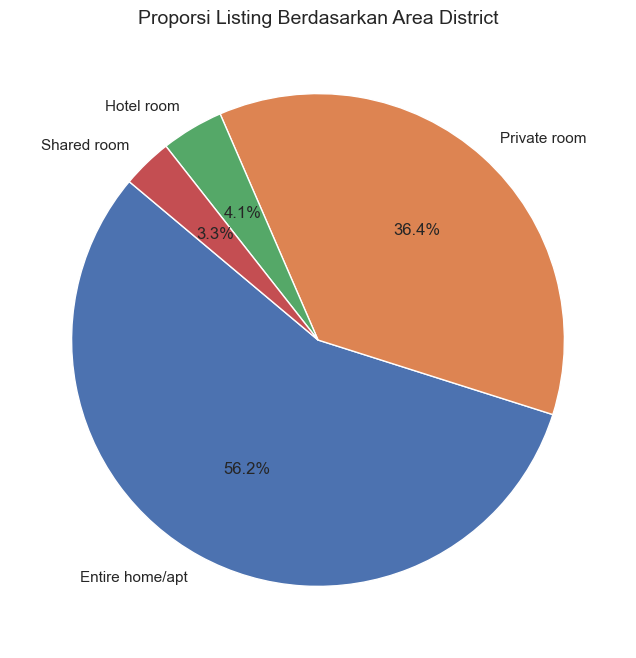

In [127]:
# Pie chart
plt.figure(figsize=(10, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Listing Berdasarkan Area District',size=14)
plt.show()

Berdasarkan data secara keseluruhan :
- Proporsi tipe kamar tertinggi adalah Entire home/apt, mencapai sekitar 56,2%
- Diikuti oleh Private room yang mencapai 36,4%. 

Hal ini menandakan bahwa sebagian besar listing Airbnb adalah rumah atau apartemen yang disewakan kepada guest, diikuti oleh kamar pribadi yang mungkin berbagi fasilitas dengan pemilik atau guest lainnya.

In [128]:
# jumlah listing berdasarkan tipe penginapan per area
x = pd.crosstab(data['area_district'], data['room_type'])
x

room_type,Entire home/apt,Hotel room,Private room,Shared room
area_district,,,,
Inner,7169,583,4111,448
Intermediate,1543,36,1269,47
Outer,200,29,390,28


In [129]:
# Menghitung chi-square
chi2, pvalue, dof, expected = chi2_contingency(x)

# Menampilkan hasil
print("Chi-square statistic:", chi2)
print("P-value:", pvalue)

# Menentukan apakah ada hubungan yang signifikan
if pvalue <= 0.05:
    print("Terdapat hubungan yang signifikan antara 'area_district' dan 'room_type'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'area_district' dan 'room_type'.")


Chi-square statistic: 364.0860462664978
P-value: 1.4581725234287723e-75
Terdapat hubungan yang signifikan antara 'area_district' dan 'room_type'.


In [130]:
x = x.div(x.sum(axis=1), axis=0)
x

room_type,Entire home/apt,Hotel room,Private room,Shared room
area_district,,,,
Inner,0.582325,0.047356,0.333929,0.036390
Intermediate,0.532988,0.012435,0.438342,0.016235
Outer,0.309119,0.044822,0.602782,0.043277


<Figure size 1000x600 with 0 Axes>

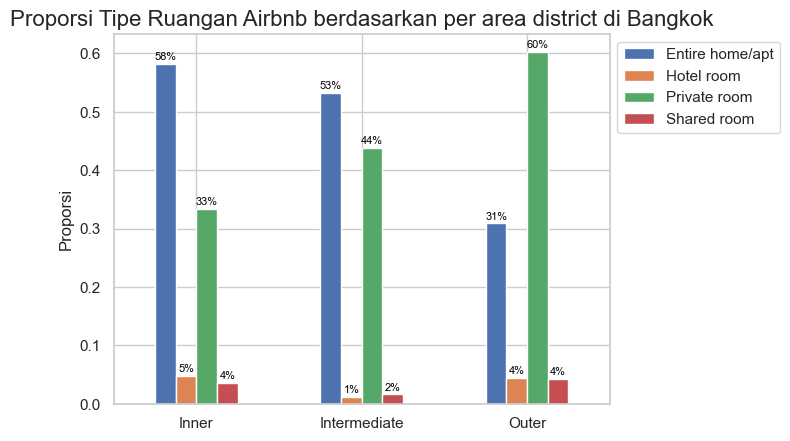

In [131]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = x.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Proporsi')
plt.title('Proporsi Tipe Ruangan Airbnb berdasarkan per area district di Bangkok',size=16)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Menambahkan persentase di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

Barplot ini menunjukkan bahwa proporsi tipe ruangan Airbnb berdasarkan per area district di Bangkok. Dari diagram ini, kita dapat melihat bahwa tipe ruangan **Entire home/apt** memiliki proporsi terbesar yaitu 58% di wilayah Inner dan 33% di wilayah Intermediate. Hal ini menunjukkan bahwa banyak guest/penyewa yang menginginkan privasi dan kenyamanan seperti di rumah sendiri.

Di sisi lain, tipe ruangan Hotel room dan Shared room memiliki proporsi kecil untuk di semua area district. Kemungkinan ini menunjukkan bahwa jenis akomodasi tersebut kurang populer di daerah-daerah tersebut.

### **2. Analisis Harga Berdasarkan Wilayah**
---


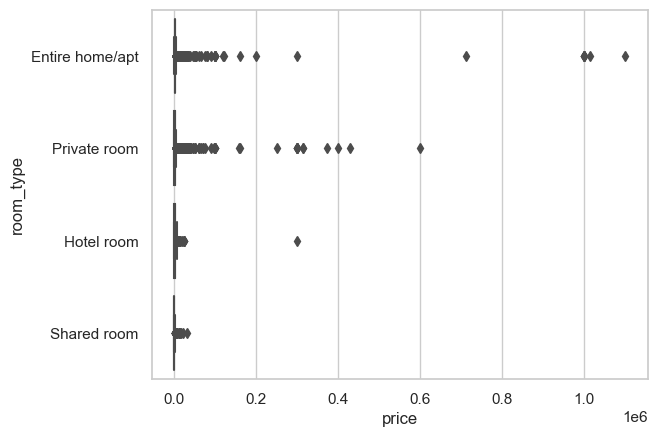

In [132]:
# cek outliers price terhadap room type
sns.boxplot(data=data, x=data['price'], y =data['room_type'])
plt.show()

Distribusi data tidak normal, maka sebaiknya menggunakan median untuk mengetahui harga per tipe ruangan agar tidak terpengaruh oleh nilai outliers.

In [133]:
median_price = data.groupby('room_type')['price'].median().reset_index().rename(columns={'price':'median_price'})
median_price

,room_type,median_price
0,Entire home/apt,1536.0
1,Hotel room,1700.0
2,Private room,1212.0
3,Shared room,500.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


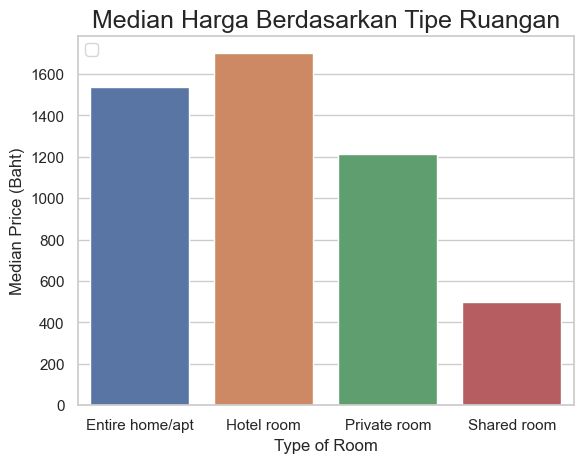

In [134]:
# Create the plot
sns.barplot(data=median_price, x='room_type', y='median_price')

# Add title and labels
plt.title('Median Harga Berdasarkan Tipe Ruangan',size=18)
plt.xlabel('Type of Room')
plt.ylabel('Median Price (Baht)')

# Add legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

- Pada tipe ruangan Hotel room memiliki median harga yang paling tinggi. Hal ini dapat disebabkan oleh faktor-faktor seperti fasilitas dan layanan yang disediakan oleh hote yang beragam, lokasi yang strategis, atau reputasi hotel yang terkenal di daerah tersebut.
- Pada tipe ruangan Entire home/apartment, median harga cenderung lebih tinggi dibandingkan private room. Tipe ruangan ini menawarkan keseluruhan rumah atau apartemen bagi pengguna Airbnb untuk digunakan secara eksklusif. Hal ini menyebabkan median harga lebih tinggi, karena memberikan privasi dan ruang yang lebih luas.
- Tipe ruangan private room menawarkan pengguna Airbnb kamar pribadi dalam rumah atau apartemen yang ditempati oleh host atau penghuni lain. Median harga untuk private room cenderung lebih rendah daripada entire home/apartment, karena pengguna harus berbagi fasilitas dengan host atau penghuni lainnya.
- Tipe ruangan share room menawarkan pengguna Airbnb tempat tidur bersama dengan pengguna lain dalam kamar yang sama. Median harga untuk share room adalah yang terendah di antara jenis kamar lainnya, karena pengguna harus berbagi kamar dengan orang lain dan kurang akan kenyamanannya.

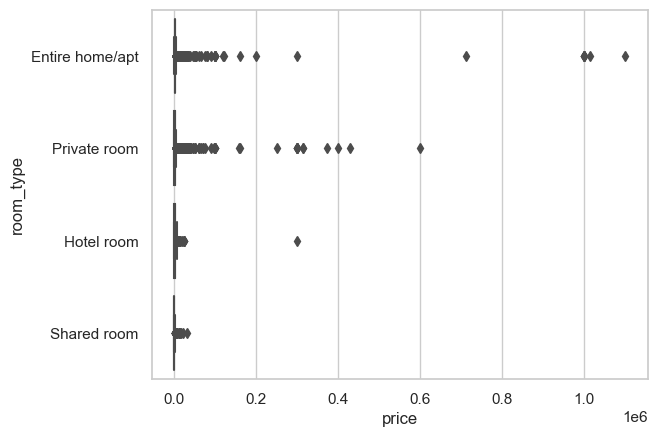

In [135]:
sns.boxplot(data=data, x=data['price'], y =data['room_type'])
plt.show()

Karena distribusi harga berdasarkan tipe ruangan tidak terdistribusi secara normal, maka analisis dilakukan dengan uji non-parametrik untuk menilai perbedaan harga antar tipe ruangan. Penggunaan median digunakan sebagai metode pembanding untuk memahami variasi harga per daerah tanpa terpengaruh oleh nilai-nilai outlier.

In [136]:
from scipy.stats import kruskal

# Melakukan uji Kruskal-Wallis
pval = kruskal(data[data['area_district'] == 'Inner']['price'], 
               data[data['area_district'] == 'Intermediate']['price'],
               data[data['area_district'] == 'Outer']['price'])

# Mengakses nilai p-value dari hasil uji
p_value = pval.pvalue

# Memeriksa apakah nilai p-value kurang dari atau sama dengan 0.05
if p_value <= 0.05:
    print('Tolak Ho')
else:
    print('Terima Ho')


Tolak Ho


Arti dari hasil uji statistik :

Ada perbedaan yang signifikan antar wilayah berdasarkan harga

In [137]:
data_a = data.groupby(['room_type', 'area_district'])['price'].median().reset_index()
data_a

,room_type,area_district,price
0,Entire home/apt,Inner,1659.0
1,Entire home/apt,Intermediate,1000.0
2,Entire home/apt,Outer,1352.0
3,Hotel room,Inner,1785.0
4,Hotel room,Intermediate,1363.0
5,Hotel room,Outer,990.0
6,Private room,Inner,1400.0
7,Private room,Intermediate,970.0
8,Private room,Outer,850.0
9,Shared room,Inner,500.0


In [139]:
data.groupby('area_district')[['price']].sum().reset_index()

,area_district,price
0,Inner,43353135
1,Intermediate,6659857
2,Outer,1000486


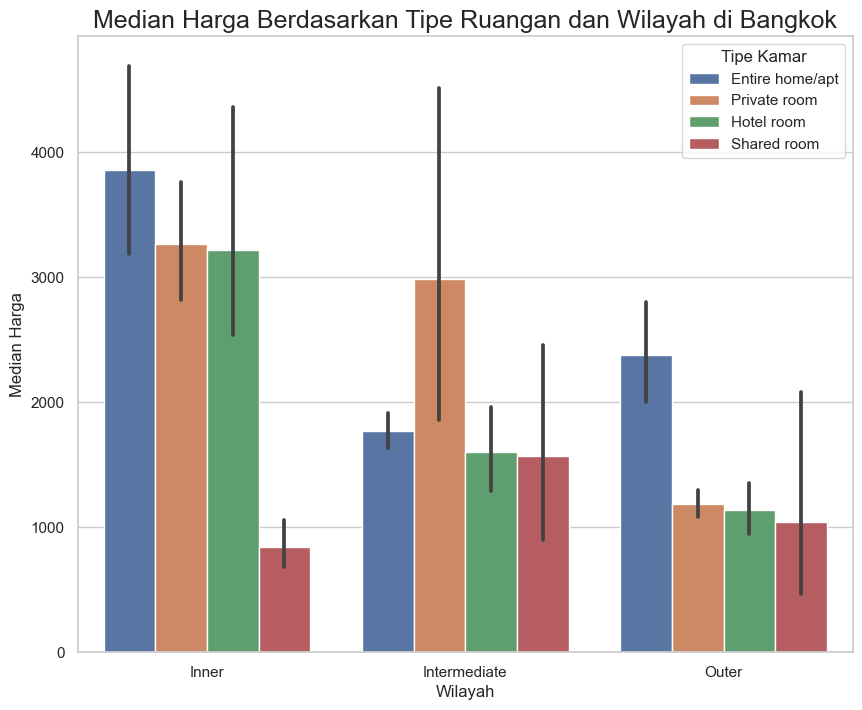

In [140]:
plt.figure(figsize=(10, 8))
sns.barplot(data=data, x='area_district', y='price', hue='room_type')
plt.xlabel('Wilayah',size=12)
plt.ylabel('Median Harga', size=12)
plt.title('Median Harga Berdasarkan Tipe Ruangan dan Wilayah di Bangkok',size=18)
plt.legend(title='Tipe Kamar')
plt.show()

Berdasarkan data median harga berdasarkan tipe ruangan dan wilayah (area_district) di Bangkok, berikut adalah interpretasi yang didapatkan:

- Pada wilayah Inner, harga Hotel room dan Entire home/apt di Inner merupakan yang paling tinggi dibandingkan dengan Intermediate dan Outer berdasarkan median harganya. Hal ini menunjukkan bahwa daerah Inner Bangkok mungkin memiliki peminat yang lebih tinggi dan biasanya menarik bagi pengguna yang mencari akomodasi dengan fasilitas dan lokasi premium di pusat Kota.

- Pada wilayah Intermediate, Hotel room median harga yang menjadi tertinggi diantara semua tipe ruangan. Dikarenakan wilayah tersebut. Dan median harga untuk semua jenis kamar di Intermediate berada di tengah-tengah, menunjukkan bahwa daerah ini menawarkan pilihan akomodasi dengan harga yang lebih terjangkau.

- Pada wilayah Outer, semua tipe ruangan memiliki median harga yang lebih rendah dari wilayah yang lainnya. Hal ini menunjukkan bahwa daerah ini mungkin menarik bagi pengguna Airbnb yang mencari akomodasi dengan harga yang lebih terjangkau atau yang ingin menjelajahi daerah yang lebih jauh dari pusat kota. Seperti ke pedesaan, area pertanian, atau perdangangan.


### **3. Analisis Lama Menginap Berdasarkan Wilayah**
---


In [141]:
# Jumlah lama menginap

data['stay_type'].value_counts().reset_index().rename(columns={'count':'lama_menginap'})

data['room_type'].value_counts().reset_index().rename(columns={'count':'jumlah_listing'})

,room_type,jumlah_listing
0,Entire home/apt,8912
1,Private room,5770
2,Hotel room,648
3,Shared room,523


In [142]:
# persentase lama menginap di listing 

stay_type_count = data['stay_type'].value_counts()
percentages = stay_type_count / len(data) * 100
percentages.reset_index().rename(columns={'count':'proporsi_lama_menginap'})

,stay_type,proporsi_lama_menginap
0,Short-Term,76.395635
1,Medium-Term,18.311991
2,Long-Term,5.292374


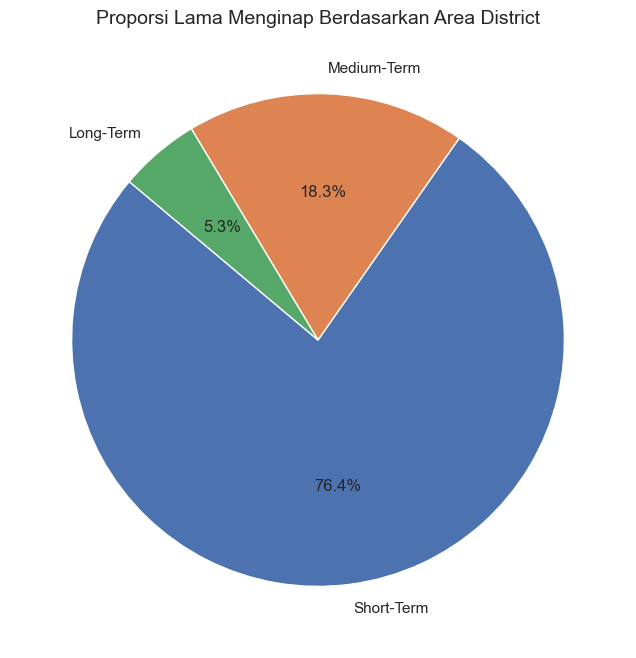

In [143]:
# Pie chart
plt.figure(figsize=(10, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Lama Menginap Berdasarkan Area District',size=14)
plt.show()

Berdasarkan data secara keseluruhan :
- Proporsi lama menginap tertinggi adalah Short-Term, mencapai sekitar 76,4%
- Diikuti oleh Medium-Term yang mencapai 18,3%. 

Hal ini menandakan bahwa sebagian besar *guest* hanya menginap dibawah 1 minggu, dimana *guest* atau wisatawan yang datang hanya untuk liburan atau ada juga yang melakukan perjalanan bisnis ke daerah tertentu.

In [144]:
# Menghitung jumlah lama menginap berdasarkan area district

area_stay = data.groupby('area_district')['stay_type'].value_counts().reset_index()
area_stay


,area_district,stay_type,count
0,Inner,Short-Term,9412
1,Inner,Medium-Term,2284
2,Inner,Long-Term,615
3,Intermediate,Short-Term,2116
4,Intermediate,Medium-Term,575
5,Intermediate,Long-Term,204
6,Outer,Short-Term,583
7,Outer,Medium-Term,44
8,Outer,Long-Term,20


  area_district    stay_type  count  prop_of_total_stays
0         Inner    Long-Term    615             3.879392
1         Inner  Medium-Term   2284            14.407368
2         Inner   Short-Term   9412            59.370466
3  Intermediate    Long-Term    204             1.286823
4  Intermediate  Medium-Term    575             3.627074
5  Intermediate   Short-Term   2116            13.347631
6         Outer    Long-Term     20             0.126159
7         Outer  Medium-Term     44             0.277550
8         Outer   Short-Term    583             3.677537


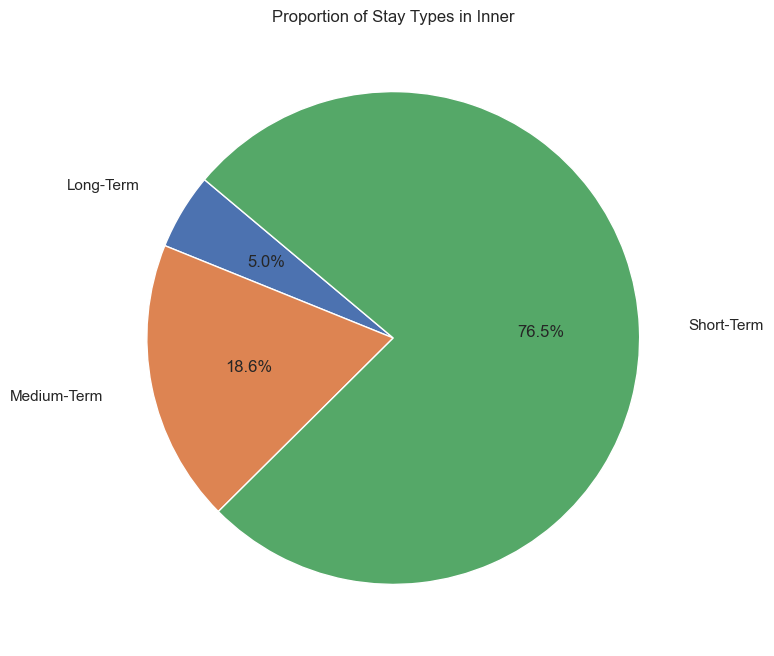

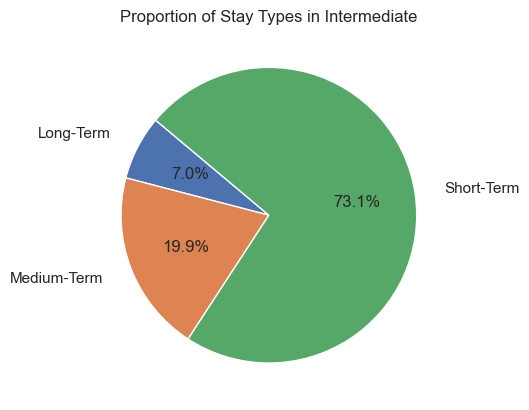

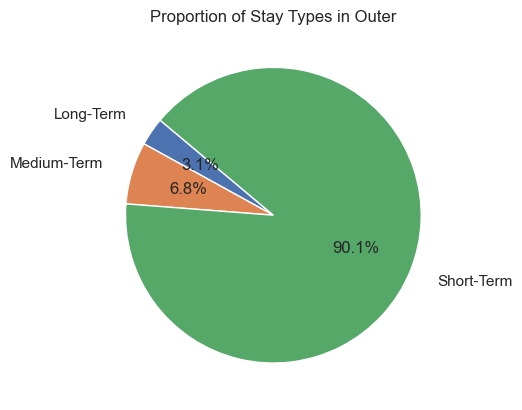

In [159]:

# Group by 'area_district' and 'stay_type' and get the counts
area_stay = data.groupby(['area_district', 'stay_type']).size().reset_index(name='count')

# Calculate total stay sum
total_stay_sum = area_stay['count'].sum()

# Calculate and update the 'prop_of_total_stays' column
area_stay['prop_of_total_stays'] = (area_stay['count'] / total_stay_sum) * 100

# Display the updated DataFrame
print(area_stay)

# Visualize proportions with a pie chart
plt.figure(figsize=(8, 8))
for district, subset in area_stay.groupby('area_district'):
    plt.pie(subset['count'], labels=subset['stay_type'], autopct='%1.1f%%', startangle=140, labeldistance=1.2)
    plt.title(f'Proportion of Stay Types in {district}')
    plt.show()


Pie chart pertama menunjukkan persentase tipe lama menginap pada wilayah Intermediate. Persentase tipe lama menginap Short-Term paling besar dengan 7.0%, sementara tipe lama menginap Long-Term paling rendah dengan 3.1%.

Pie chart kedua menunjukkan persentase tipe lama menginap pada wilayah Inner. Persentase tipe lama menginap Short-Term dan Medium-Term agak rendah, yaitu 5.0% dan 3.1% masing-masing. Tipe lama menginap Long-Term memiliki persentase yang sedikit lebih tinggi, yaitu 6.8%.

Pie chart ketiga menunjukkan persentase tipe lama menginap pada wilayah Outer. Persentase tipe lama menginap Short-Term dan Medium-Term paling besar dengan 73.1% dan 90.1% masing-masing. Tipe lama menginap Long-Term memiliki persentase yang rendah, yaitu 76.5%.

Dalam keseluruhan, dapat disimpulkan bahwa:

- Tipe lama menginap Short-Term dan Medium-Term lebih populer pada wilayah Outer daripada wilayah Intermediate dan Inner.
Tipe lama menginap Long-Term lebih populer pada wilayah Inner daripada kelompok Intermediate.
Tipe lama menginap paling populer pada wilayah Outer adalah Short-Term dan Medium-Term.
Tipe lama menginap paling rendah pada wilayah Inner dan Outer adalah Long-Term.
Tipe lama menginap paling rendah pada wilayah Intermediate adalah Long-Term dan Medium-Term.

## **KESIMPULAN**
---


Berdasarkan analisis yang telah dilakukan, berikut adalah kesimpulan yang dapat diambil untuk mengidentifikasi karakteristik listing berdasarkan wilayah dan yang diminati oleh *guest* di Airbnb Listing Bangkok:

1. Pada daerah Inner, tipe ruangan Airbnb berdasarkan per area district di Bangkok. Dari sini, saya simpulkan bahwa bahwa tipe ruangan **Entire home/apt** memiliki proporsi terbesar yaitu 58% di wilayah Inner dan 33% di wilayah Intermediate. Hal ini menunjukkan bahwa banyak guest/penyewa yang menginginkan privasi dan kenyamanan seperti di rumah sendiri. Di sisi lain, tipe ruangan Hotel room dan Shared room memiliki proporsi kecil untuk di semua area district. Kemungkinan ini menunjukkan bahwa jenis akomodasi tersebut kurang populer di daerah-daerah tersebut.

2. Berdasarkan tipe ruangan dan wilayah (area_district) di Bangkok :
- Inner : Harga Hotel room dan Entire home/apt di Inner Bangkok cenderung lebih tinggi daripada di Intermediate dan Outer.
- Intermediate : Hotel room memiliki median harga tertinggi di wilayah Intermediate. Menandakan adanya pilihan akomodasi dengan harga yang lebih terjangkau dibandingkan dengan Inner.
- Outer : Semua tipe ruangan di Outer Bangkok memiliki median harga yang lebih rendah dibandingkan dengan wilayah lainnya. Daerah ini kemungkinan menarik bagi pengguna yang mencari akomodasi dengan harga lebih terjangkau.

3. Secara umum, wilayah Outer memiliki kecenderungan untuk menjadi tujuan utama bagi pengguna Airbnb yang melakukan kunjungan singkat atau menengah. Wilayah Inner lebih cenderung menarik bagi mereka yang mencari penginapan dalam jangka waktu yang lebih lama. Wilayah Intermediate memiliki campuran preferensi, dengan dominasi tipe Short-Term.

## **RECOMMENDATION**
---


Berdasarkan analisis karakteristik listing Airbnb di Bangkok, terutama dalam hal tipe ruangan dan harga berdasarkan wilayah, berikut beberapa rekomendasi untuk pengembangan strategi dan peningkatan daya tarik listing:

**1. Daerah Inner Bangkok** :

Rekomendasi Tempat Wisata: Fokus pada promosi tempat-tempat wisata populer dan kegiatan kultural di sekitar wilayah Inner Bangkok. Jelaskan keunikan dan kenyamanan penginapan berjenis Entire home/apt, yang banyak diminati oleh tamu di wilayah ini.
Rekomendasi Tambahan: Pertimbangkan menawarkan paket khusus untuk tamu yang menginap dalam jangka waktu yang lebih lama, seperti diskon untuk pemesanan mingguan atau bulanan.

**2.Daerah Intermediate** :

Rekomendasi Tempat Wisata: Highlight tempat-tempat unik di sekitar wilayah Intermediate, serta promosikan berbagai jenis akomodasi dengan harga yang lebih terjangkau, khususnya Hotel room yang memiliki median harga tertinggi.
Rekomendasi Tambahan: Pertimbangkan kolaborasi dengan tempat-tempat populer di wilayah ini untuk menawarkan paket akomodasi dan pengalaman lokal yang menarik.

**3. Daerah Outer Bangkok**:

Rekomendasi Tempat Wisata: Fokus pada promosi destinasi wisata di luar kota, seperti area pedesaan, kebun buah, atau tempat-tempat alam yang menarik. Tekankan kelebihan akomodasi dengan harga lebih terjangkau.
Rekomendasi Tambahan: Perkuat promosi untuk tipe ruangan Entire home/apt yang mungkin lebih diminati oleh tamu yang ingin menjelajahi daerah lebih jauh.

**4. Rekomendasi Umum** :

Tawarkan diskon atau paket khusus untuk pemesanan jangka panjang di wilayah Inner.
Tingkatkan visibilitas listing dengan menambahkan informasi unik, foto berkualitas tinggi, dan deskripsi menarik.
Perbarui harga secara berkala sesuai dengan tren pasar dan kebutuhan tamu.
Selalu perhatikan umpan balik tamu dan gunakan sebagai bahan evaluasi dan peningkatan.
Dengan mengikuti rekomendasi ini, diharapkan listing Airbnb di berbagai wilayah di Bangkok dapat menarik lebih banyak tamu dan memenuhi berbagai preferensi pengguna.